In [1]:
import os,shutil
original_data_dir=r'F:\work\pywork\ipython\python_ml\keras_data\dog&cat\train'
base_dir=r'F:\work\pywork\ipython\python_ml\keras_data\dog&cat_small'

if os.path.isdir(base_dir):
    shutil.rmtree(base_dir)

os.makedirs(base_dir)

train_dir=os.path.join(base_dir,'train')
os.makedirs(train_dir)
val_dir=os.path.join(base_dir,'val')
os.makedirs(val_dir)
test_dir=os.path.join(base_dir,'test')
os.makedirs(test_dir)

train_cat_dir=os.path.join(train_dir,'cats')
os.makedirs(train_cat_dir)
train_dog_dir=os.path.join(train_dir,'dogs')
os.makedirs(train_dog_dir)

val_cat_dir=os.path.join(val_dir,'cats')
os.makedirs(val_cat_dir)
val_dog_dir=os.path.join(val_dir,'dogs')
os.makedirs(val_dog_dir)

test_cat_dir=os.path.join(test_dir,'cats')
os.makedirs(test_cat_dir)
test_dog_dir=os.path.join(test_dir,'dogs')
os.makedirs(test_dog_dir)

In [2]:

def copyfile(destination_path,fnames,original_data_dir=original_data_dir):
    for fname in fnames:
        src=os.path.join(original_data_dir,fname)
        dst=os.path.join(destination_path,fname)
        shutil.copyfile(src,dst)

In [3]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
copyfile(train_cat_dir,fnames)

In [4]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
copyfile(val_cat_dir,fnames)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
copyfile(test_cat_dir,fnames)

In [5]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
copyfile(train_dog_dir,fnames)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
copyfile(val_dog_dir,fnames)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
copyfile(test_dog_dir,fnames)

In [6]:
len(os.listdir(train_cat_dir))

1000

In [7]:
from keras import models,layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers,losses

model.compile(loss=losses.binary_crossentropy,
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255) 
test_datagen=ImageDataGenerator(rescale=1./255)
train_genertor=train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')
val_genertor=test_datagen.flow_from_directory(
                val_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
i=0
for data,label in train_genertor:
    print(data.shape,label.shape)
    break

(20, 150, 150, 3) (20,)


In [11]:
history=model.fit_generator(
    train_genertor,
    steps_per_epoch=100,
    epochs=30,
    validation_data=val_genertor,
    validation_steps=50)
model.save(r'model/cat_and_dog_small_1.h5')

Epoch 1/30
100/100 [==============================] - 19s 190ms/step - loss: 0.6898 - acc: 0.5300 - val_loss: 0.6969 - val_acc: 0.5190
Epoch 2/30
100/100 [==============================] - 9s 86ms/step - loss: 0.6594 - acc: 0.6015 - val_loss: 0.6425 - val_acc: 0.6360
Epoch 3/30
100/100 [==============================] - 9s 87ms/step - loss: 0.6143 - acc: 0.6640 - val_loss: 0.6335 - val_acc: 0.6130
Epoch 4/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5741 - acc: 0.7010 - val_loss: 0.5928 - val_acc: 0.6700
Epoch 5/30
100/100 [==============================] - 9s 86ms/step - loss: 0.5452 - acc: 0.7210 - val_loss: 0.5809 - val_acc: 0.6850
Epoch 6/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5191 - acc: 0.7395 - val_loss: 0.5807 - val_acc: 0.6810
Epoch 7/30
100/100 [==============================] - 9s 85ms/step - loss: 0.4932 - acc: 0.7615 - val_loss: 0.5639 - val_acc: 0.6820
Epoch 8/30
100/100 [==============================] - 9s 85ms/step 

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
def plt_loss_acc(history):
    acc=history.history['acc']
    val_acc=history.history['val_acc']
    loss=history.history['loss']
    val_loss=history.history['val_loss']



    epochs=range(1,len(acc)+1)
    plt.plot(epochs,acc,'bo',label='train_acc')
    plt.plot(epochs,val_acc,'b--',label='val_acc')

    plt.legend()
    plt.figure()
    plt.plot(epochs,loss,'go',label='train_loss')
    plt.plot(epochs,val_loss,'g--',label='val_loss')
    plt.legend()

In [13]:
from keras import models,layers,optimizers,losses
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(loss=losses.binary_crossentropy,
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [14]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_genertor=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
val_genertor=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')
history=model.fit_generator(
    train_genertor,
    epochs=100,
    steps_per_epoch=100,
    validation_data=val_genertor,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6915 - acc: 0.5225 - val_loss: 0.6825 - val_acc: 0.5343
Epoch 2/100
100/100 [==============================] - 15s 154ms/step - loss: 0.6745 - acc: 0.5794 - val_loss: 0.6397 - val_acc: 0.6347
Epoch 3/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6622 - acc: 0.6100 - val_loss: 0.6402 - val_acc: 0.6320
Epoch 4/100
100/100 [==============================] - 15s 155ms/step - loss: 0.6458 - acc: 0.6228 - val_loss: 0.6115 - val_acc: 0.6495
Epoch 5/100
100/100 [==============================] - 16s 155ms/step - loss: 0.6301 - acc: 0.6497 - val_loss: 0.5950 - val_acc: 0.6783
Epoch 6/100
100/100 [==============================] - 16s 155ms/step - loss: 0.6137 - acc: 0.6728 - val_loss: 0.5586 - val_acc: 0.7210
Epoch 7/100
100/100 [==============================] - 15s 155ms/step - loss: 0.6052 - acc: 0.6672 -

100/100 [==============================] - 15s 155ms/step - loss: 0.3974 - acc: 0.8091 - val_loss: 0.4483 - val_acc: 0.8077
Epoch 61/100
100/100 [==============================] - 15s 155ms/step - loss: 0.4056 - acc: 0.8138 - val_loss: 0.4454 - val_acc: 0.8048
Epoch 62/100
100/100 [==============================] - 16s 156ms/step - loss: 0.3948 - acc: 0.8253 - val_loss: 0.4414 - val_acc: 0.7982
Epoch 63/100
100/100 [==============================] - 15s 154ms/step - loss: 0.3979 - acc: 0.8175 - val_loss: 0.4902 - val_acc: 0.7861
Epoch 64/100
100/100 [==============================] - 15s 155ms/step - loss: 0.3934 - acc: 0.8269 - val_loss: 0.4081 - val_acc: 0.8151
Epoch 65/100
100/100 [==============================] - 15s 155ms/step - loss: 0.3917 - acc: 0.8156 - val_loss: 0.4485 - val_acc: 0.8084
Epoch 66/100
100/100 [==============================] - 16s 155ms/step - loss: 0.3942 - acc: 0.8209 - val_loss: 0.4668 - val_acc: 0.7945
Epoch 67/100
100/100 [==============================] 

In [15]:
model.save(r'model\cats_and_dogs_small_2.h5')

In [16]:
from keras.applications import VGG16
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

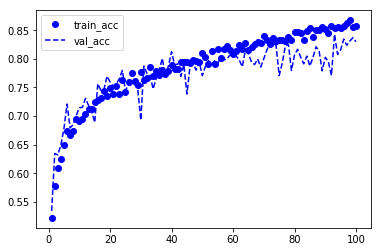

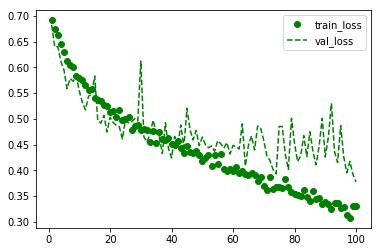

In [17]:
plt_loss_acc(history)

In [18]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(rescale=1./255)
batch_size=20

def extract_features(directory,sample_count):
    features=np.zeros(shape=(sample_count,4,4,512))
    labels=np.zeros(shape=(sample_count))
    generator=datagen.flow_from_directory(
        directory,
        batch_size=batch_size,
        target_size=(150,150),
        class_mode='binary')
    i=0
    for input_batch,label_batch in generator:
        feature_batch=conv_base.predict(input_batch)
        features[i*batch_size:(i+1)*batch_size]=feature_batch
        labels[i*batch_size:(i+1)*batch_size]=label_batch
        i+=1
        if i*batch_size>=sample_count:
            break
    return features,labels

In [19]:
train_feature,train_labels=extract_features(train_dir,2000)
val_feature,val_labels=extract_features(val_dir,1000)
test_feature,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
train_feature=np.reshape(train_feature,(2000,4*4*512))
val_feature=np.reshape(val_feature,(1000,4*4*512))
test_feature=np.reshape(test_feature,(1000,4*4*512))

In [21]:
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(
    train_feature,train_labels,
    epochs=30,batch_size=20,
    validation_data=(val_feature,val_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 651us/step - loss: 0.5915 - acc: 0.6810 - val_loss: 0.4376 - val_acc: 0.8340
Epoch 2/30
2000/2000 [==============================] - 1s 473us/step - loss: 0.4391 - acc: 0.7970 - val_loss: 0.3593 - val_acc: 0.8590
Epoch 3/30
2000/2000 [==============================] - 1s 478us/step - loss: 0.3492 - acc: 0.8585 - val_loss: 0.3267 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 1s 471us/step - loss: 0.3240 - acc: 0.8650 - val_loss: 0.2969 - val_acc: 0.8940
Epoch 5/30
2000/2000 [==============================] - 1s 485us/step - loss: 0.2916 - acc: 0.8820 - val_loss: 0.2820 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 1s 474us/step - loss: 0.2735 - acc: 0.8845 - val_loss: 0.2751 - val_acc: 0.8930
Epoch 7/30
2000/2000 [==============================] - 1s 490us/step - loss: 0.2500 - acc: 0.9020 - val_loss: 0.2621 - val_acc: 0.9020


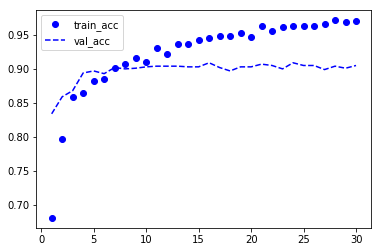

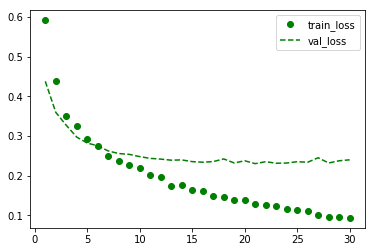

In [22]:
plt_loss_acc(history)

In [38]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [39]:
len(model.trainable_weights)

10

In [40]:
conv_base.trainable=False

In [41]:
len(model.trainable_weights)

4

In [42]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers,losses

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

val_generator=test_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss=losses.binary_crossentropy,
             metrics=['acc'])


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [43]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=val_generator,
        validation_steps=50)

Epoch 1/30
100/100 [==============================] - 69s 692ms/step - loss: 0.3658 - acc: 0.8710 - val_loss: 0.2179 - val_acc: 0.9180
Epoch 2/30
100/100 [==============================] - 39s 390ms/step - loss: 0.1928 - acc: 0.9470 - val_loss: 0.1702 - val_acc: 0.9280
Epoch 3/30
100/100 [==============================] - 39s 390ms/step - loss: 0.1433 - acc: 0.9535 - val_loss: 0.1672 - val_acc: 0.9370
Epoch 4/30
100/100 [==============================] - 39s 390ms/step - loss: 0.1138 - acc: 0.9650 - val_loss: 0.1520 - val_acc: 0.9370
Epoch 5/30
100/100 [==============================] - 39s 390ms/step - loss: 0.0995 - acc: 0.9730 - val_loss: 0.1563 - val_acc: 0.9330
Epoch 6/30
100/100 [==============================] - 39s 390ms/step - loss: 0.0936 - acc: 0.9675 - val_loss: 0.1565 - val_acc: 0.9300
Epoch 7/30
100/100 [==============================] - 39s 390ms/step - loss: 0.0823 - acc: 0.9770 - val_loss: 0.1571 - val_acc: 0.9390
Epoch 8/30
100/100 [==============================] - 3

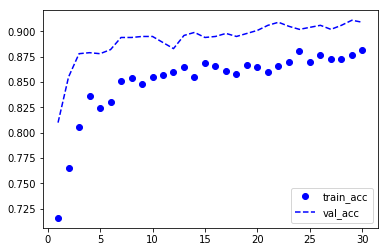

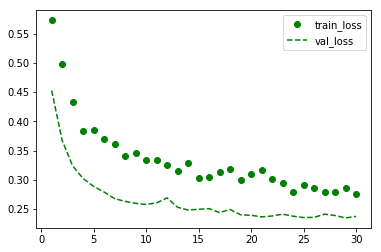

In [29]:
plt_loss_acc(history)

In [44]:
model.save('model/cats_and_dogs_small_4.h5')

In [31]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_loss,test_acc=model.evaluate_generator(
    test_generator,steps=50)
print(test_acc,test_loss)

Found 1000 images belonging to 2 classes.
0.8889999961853028 0.256202435977757


In [32]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False
len(model.trainable_weights)        

10

In [33]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-5),
             loss=losses.binary_crossentropy,
             metrics=['acc'])

In [34]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=30,
        validation_data=val_generator,
        validation_steps=20)

Epoch 1/30
100/100 [==============================] - 39s 388ms/step - loss: 0.2901 - acc: 0.8780 - val_loss: 0.2195 - val_acc: 0.9250
Epoch 2/30
100/100 [==============================] - 38s 378ms/step - loss: 0.2637 - acc: 0.8840 - val_loss: 0.2361 - val_acc: 0.8900
Epoch 3/30
100/100 [==============================] - 38s 378ms/step - loss: 0.2200 - acc: 0.9160 - val_loss: 0.1993 - val_acc: 0.9175
Epoch 4/30
100/100 [==============================] - 38s 378ms/step - loss: 0.2257 - acc: 0.9055 - val_loss: 0.2562 - val_acc: 0.8975
Epoch 5/30
100/100 [==============================] - 38s 377ms/step - loss: 0.2200 - acc: 0.9065 - val_loss: 0.2578 - val_acc: 0.9125
Epoch 6/30
100/100 [==============================] - 38s 378ms/step - loss: 0.1932 - acc: 0.9220 - val_loss: 0.1996 - val_acc: 0.9175
Epoch 7/30
100/100 [==============================] - 38s 378ms/step - loss: 0.1729 - acc: 0.9315 - val_loss: 0.1747 - val_acc: 0.9250
Epoch 8/30
100/100 [==============================] - 3

In [36]:
model.save('model/cats_and_dogs_small_3.h5')